In [ ]:
#제안분포는 모두  Gumbel 분포를 사용하지만,  Gumbel 분포의 분산을 다르게 했을 때를 비교하여
#제안분포에 따라 결과가 어떻게 달라지는지 볼 것이다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def p(x):
  return 1/np.sqrt(2*np.pi) * np.exp(-(x**2)/2)

def q(x,m,s=0.5):
  return 1/s * np.exp(-(x-m)/s) * np.exp( -np.exp(-(x-m)/s) )

def alpha(x,x_star,s):
  v = (p(x_star)*q(x,x_star,s))/(p(x)*q(x_star,x,s))
  return  min(1, v)

In [4]:
def gumbel_M_H(x,s,T):
  acc_count=0###
  x_list=[x]

  for i in range(T):
    x_star = np.random.gumbel(x,s)

    if np.random.uniform() < alpha(x,x_star,s):
      acc_count+=1 #받아들인 수를 카운트 한다.
    else:
      x_star=x

    x_list.append(x_star)
    x=x_star

  print('acceptance ratio: ',acc_count/T) #검블에서 새로 뽑은 변수를 받아들안 비율을 출력
  return x_list

# s(분산)=0.5

acceptance ratio:  0.68942


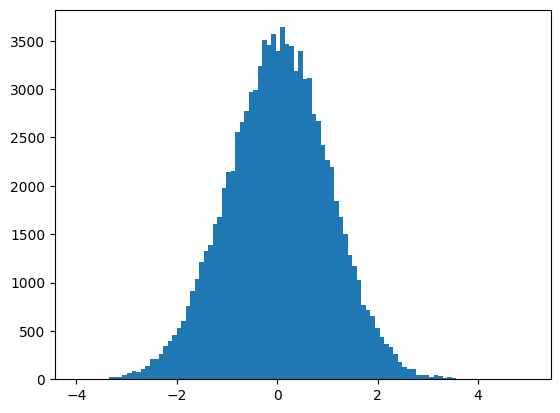

In [9]:
T=100000 #반복수
x=5 #초기값

s=0.5

x_list = gumbel_M_H(x,s,T)

plt.hist(x_list,bins=100)
plt.show()

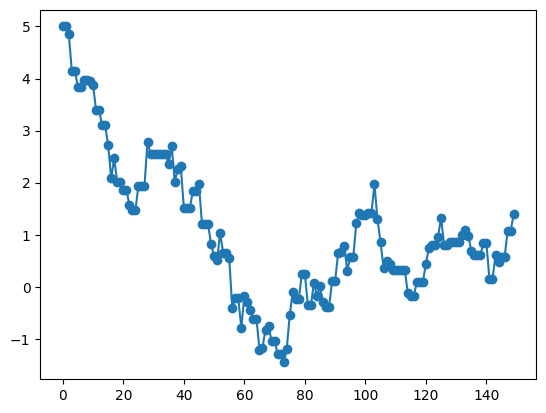

In [11]:
plt.plot(x_list[:150]) #x가 초기값 5에서 0으로 다가가는 것이 보임.
plt.scatter([i for i in range(150)], x_list[:150])

#s(분산)가 0.1 또는 100 일때

acceptance ratio:  0.73159


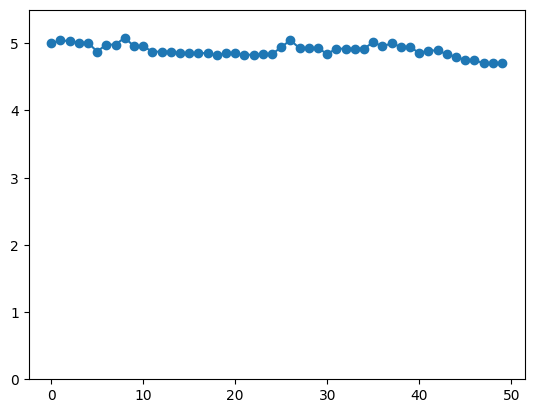

In [15]:
T=100000 #반복수
x=5 #초기값

s=0.1

x_list = gumbel_M_H(x,s,T)

#50개 정도만 보였다
plt.plot(x_list[:50])
plt.scatter([i for i in range(50)], x_list[:50])
plt.ylim([0, 5.5])
plt.show()

#분산이 너무 작아서 받아들인다고 해도, 너무 미미한 값이기 때문에, x가 크게 줄어들지 못한다.

acceptance ratio:  0.01084


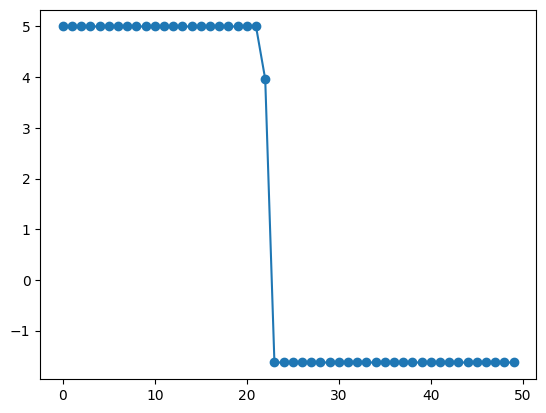

In [18]:
T=100000 #반복수
x=5 #초기값

s=100

x_list = gumbel_M_H(x,s,T)

#50개 정도만 보였다
plt.plot(x_list[:50])
plt.scatter([i for i in range(50)], x_list[:50])
plt.show()

#분산이 너무 커서 쉽게 받아들여지지도 않고, 받아들여져도 0을 기준으로 쉽게 다가가지 못한다.

# 자기상관함수 도표, 상관시간

In [ ]:
#각각의 샘플끼리의 상관관계가 사라지는 간격의 거리를 볼 수 있다.

In [19]:
from pandas import Series

In [20]:
x_list = gumbel_M_H(5,0.5,100000) #초기값 5, 분산 0.5, 반복수 100000

S = Series(x_list)

s_list=[]
for i in range(100):
  s_list.append(S.autocorr(i))

acceptance ratio:  0.68974


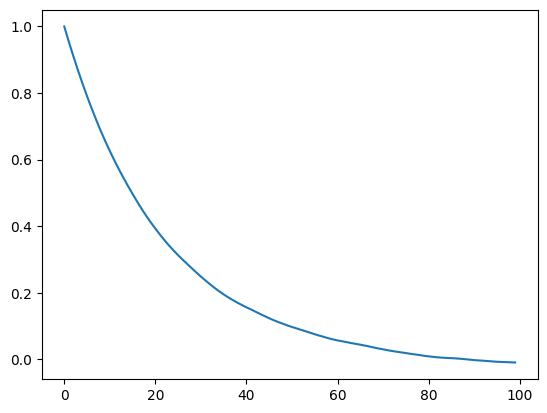

In [21]:
plt.plot(s_list) #1(100%)에서 0으로 가까이감

In [23]:
x_list_1 = gumbel_M_H(5,0.1,100000) #분산이 0.1
x_list_2 = gumbel_M_H(5,0.5,100000) #분산이 0.5
x_list_3 = gumbel_M_H(5,100,100000) #분산이 100

acceptance ratio:  0.73407
acceptance ratio:  0.69349
acceptance ratio:  0.01121


In [24]:
#상관시간 계산
s_lists=[]
for i in [x_list_1, x_list_2, x_list_3]:
  S = Series(i)
  s_list=[]

  for i in range(500):
    s_list.append(S.autocorr(i))

  s_lists.append(s_list)

(-0.1, 1.1)

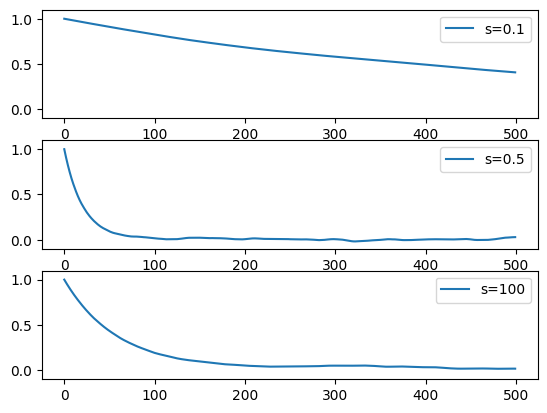

In [25]:
plt.subplot(311)
plt.plot(s_lists[0])
plt.legend(['s=0.1'])
plt.ylim([-0.1, 1.1])

plt.subplot(312)
plt.plot(s_lists[1])
plt.legend(['s=0.5'])
plt.ylim([-0.1, 1.1])

plt.subplot(313)
plt.plot(s_lists[2])
plt.legend(['s=100'])
plt.ylim([-0.1, 1.1])

#s=0.5일때가 가장 0으로 빠르게 수렴한다.(가장 적절하다)

In [27]:
#위 값을 합으로 표현하면..

s_lists_sum=[]
for i in [x_list_1, x_list_2, x_list_3]:
  S = Series(i)
  s_list=[]
  value=0
  for i in range(500):
    value += S.autocorr(i)
    s_list.append(value)
  s_lists_sum.append(s_list)

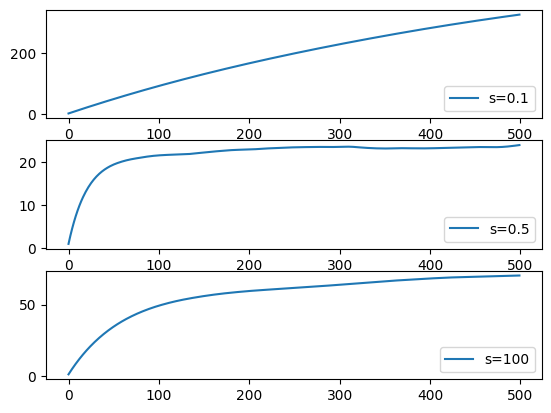

In [28]:
plt.subplot(311)
plt.plot(s_lists_sum[0])
plt.legend(['s=0.1'], loc='lower right')

plt.subplot(312)
plt.plot(s_lists_sum[1])
plt.legend(['s=0.5'], loc='lower right')

plt.subplot(313)
plt.plot(s_lists_sum[2])
plt.legend(['s=100'], loc='lower right')

#s=0.5일때가 가장 0으로 빠르게 수렴한다.(가장 적절하다)